# Imports

In [1]:
# imports

import os
import numpy as np
import random
import pandas as pd
import json
import cv2
import datetime
import pickle
import matplotlib.pyplot as plt
from utils import *

In [2]:
# Global settings
FREQBINS = 50
SIGMA = 25

# From EDA
ROWS = 256
COLS = 256

# Control runtime
run_retrain = False
display_orig_filt_images = True

# Import and split data

In [3]:
# define file directory
directory = '../data/interim/PatternNet/PatternNet/images'

# create a list of all possible classes
all_classes = []
for item in os.listdir(directory):
    item_path = os.path.join(directory, item)
    if os.path.isdir(item_path):
        all_classes.append(item)
#print(all_classes)
        
# create a list of classes considered for this project
classes = ['beach', 'chaparral', 'dense_residential', 'forest', 'freeway', 'harbor', 'overpass', 'parking_space', 'river', 'swimming_pool']
        
# inspect the number of images per class
data = []
for class_name in classes:
    class_dir = os.path.join(directory, class_name)
    image_count = len(os.listdir(class_dir))
    data.append([class_name, image_count])
image_count_df = pd.DataFrame(data, columns=['Class', 'Total Image Count'])
print("The following classes were selected for evaluation:")
display(image_count_df)

# define the train, val, and test sets
train_files, val_files, test_files = generate_splits(classes, directory)

The following classes were selected for evaluation:


,Class,Total Image Count
0,beach,800
1,chaparral,800
2,dense_residential,800
3,forest,800
4,freeway,800
5,harbor,800
6,overpass,800
7,parking_space,800
8,river,800
9,swimming_pool,800


train/validation/test subsets were loaded from a pre-generated file
	Number of train files: 4799
	Number of val files: 1599
	Number of test files: 1601


# Utility functions

In [4]:
def compute_fft(img, filt):
    #img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    filtered_image = apply_gaussian_filter(img, filt)
    magnitude_spectrum = fft_image(filtered_image)
    spec = np.log(1+magnitude_spectrum).ravel()
            
    hist, bins = np.histogram(spec, bins=FREQBINS)
    
    # We don't particularly care about the exact bin boundaries. 
    # Just need the distribution of freq spectrum.

    return hist, bins, np.log(1+magnitude_spectrum)

In [5]:
# define a function to show a grid of spectrum images in a directory (given a file subset)
def display_orig_filtered_image(files, directory, images_per_class=3, sigma=SIGMA):
    # create a dictionary to store class images
    class_images = {}
    
    # iterate over each file
    for class_name, file_name in files:
        # load the image
        #img = plt.imread(os.path.join(directory, class_name, file_name))
        image_path = os.path.join(directory, class_name, file_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
        # if class not in dictionary, initialize empty list
        if class_name not in class_images:
            class_images[class_name] = []
        # append image to class list
        class_images[class_name].append(img)

    # create a grid of images
    filt = create_gaussian_filter(256, 256, 25)
 
    num_classes = len(class_images)
    fig, axes = plt.subplots(num_classes, (images_per_class+3), figsize=(8, 2*num_classes))
    for i, (class_name, images) in enumerate(class_images.items()):
        #display class name in the first column
        axes[i, 0].text(0.5, 0.5, class_name, fontsize=14, ha='center', va='center')
        axes[i, 0].axis('off')

        # display random images in the subsequent columns
        random.shuffle(images)
        for j in range(images_per_class):
            freq_features, bins, spectrum = compute_fft(images[j], filt)

            axes[i, j+1].imshow(images[j], cmap='gray')
            axes[i, j+1].axis('off')
            axes[i, j+2].imshow(spectrum, cmap='gray')
            axes[i, j+2].axis('off')
            axes[i, j+3].bar(bins[:-1], freq_features, width=np.diff(bins), edgecolor="black", align="edge")
            axes[i, j+3].axis('off')

            #axes[i, j+2].imshow(spectrum, cmap='gray')


    plt.tight_layout()
    plt.show()

    return

## main function to control execution

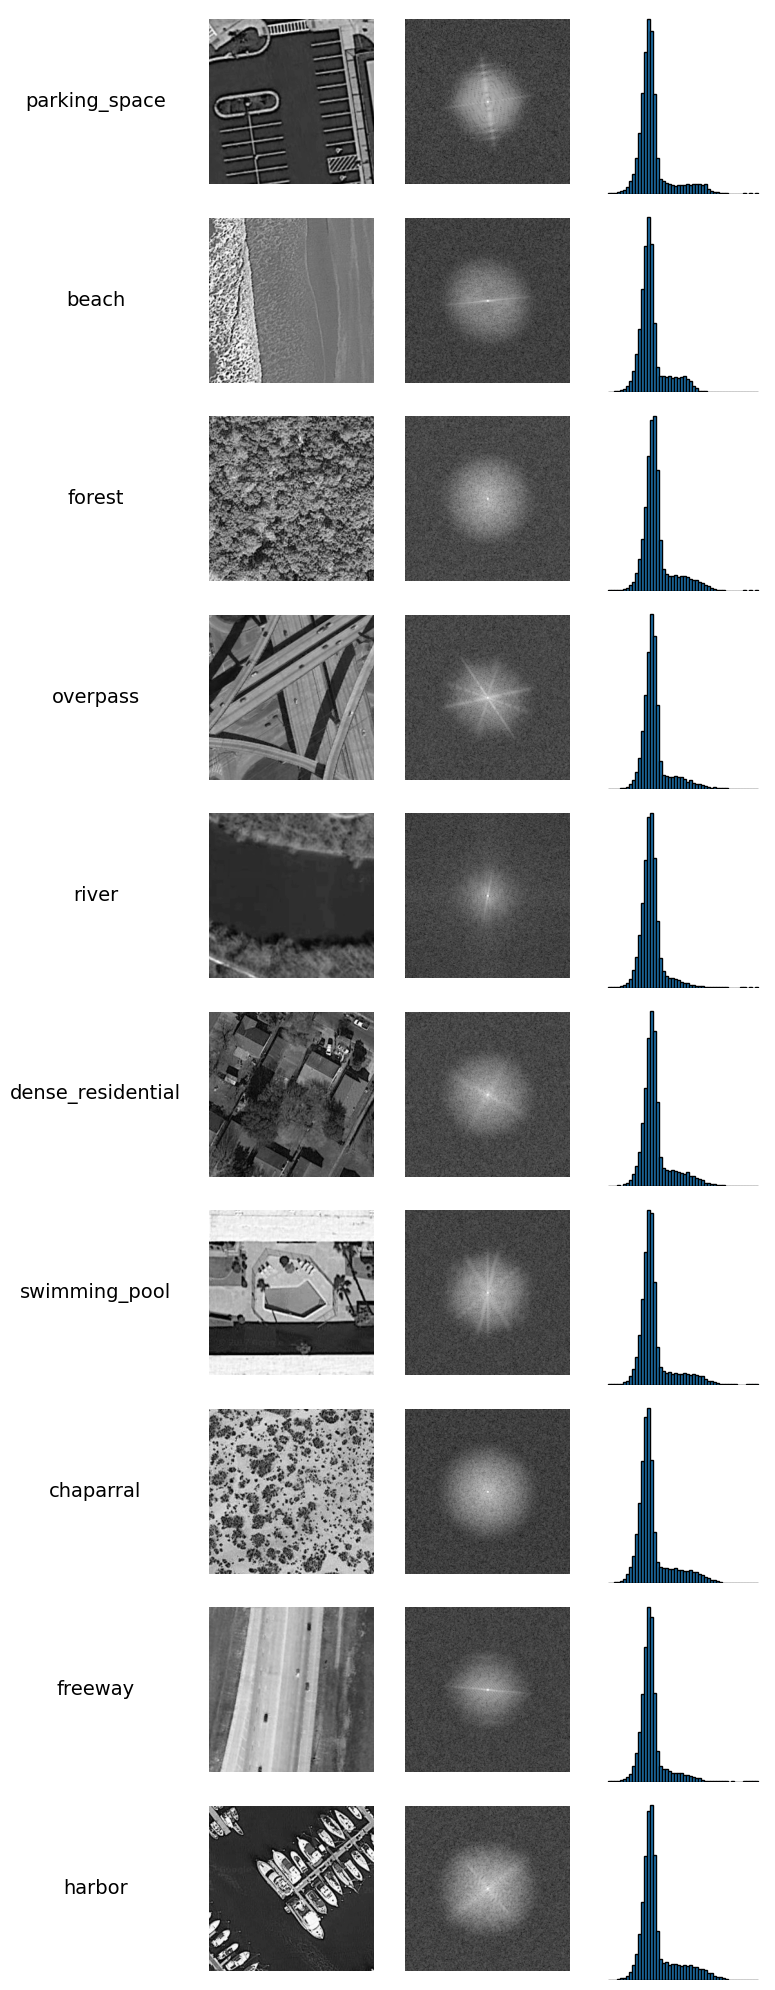

In [6]:
display_orig_filtered_image(train_files, directory, images_per_class=1, sigma=SIGMA)